# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [4]:
#install spacy in the current conda environment
!pip install spacy


In [5]:
#download a small language model to help with cleaning tasks
!python -m spacy download en_core_web_sm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 15.8 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

### Problem 1 and example: common words in the Michigan subreddit

In [7]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [8]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \nMatter \nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [9]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [10]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [11]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [12]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [13]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [14]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [15]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

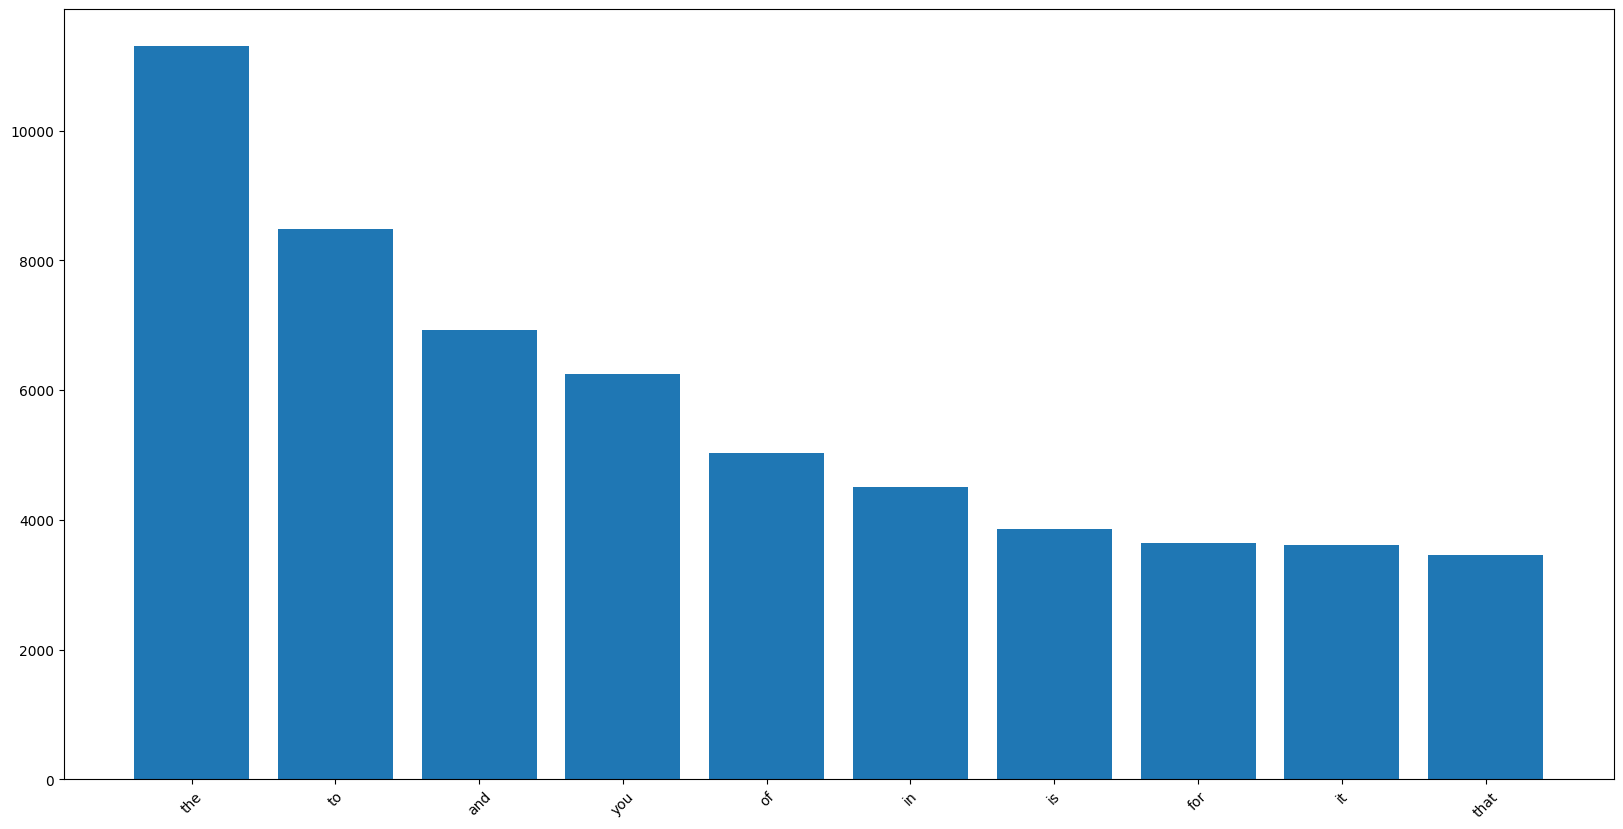

In [17]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

Answer here: I notice that the most common words in the graph are basically prepositions, they are common, so it is not useful for we to study this community.

#### Lemmatization and stopword removal

In [18]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [19]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [20]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [21]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8637 sparse matrix of type '<class 'numpy.int64'>'
	with 126833 stored elements in Compressed Sparse Row format>

In [22]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not               2862
student           1183
like              1183
people            1124
class              988
                  ... 
sell minnesota       3
cred                 3
credential           3
sell oregon          3
pay dollar           3
Length: 8637, dtype: int64

In [23]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

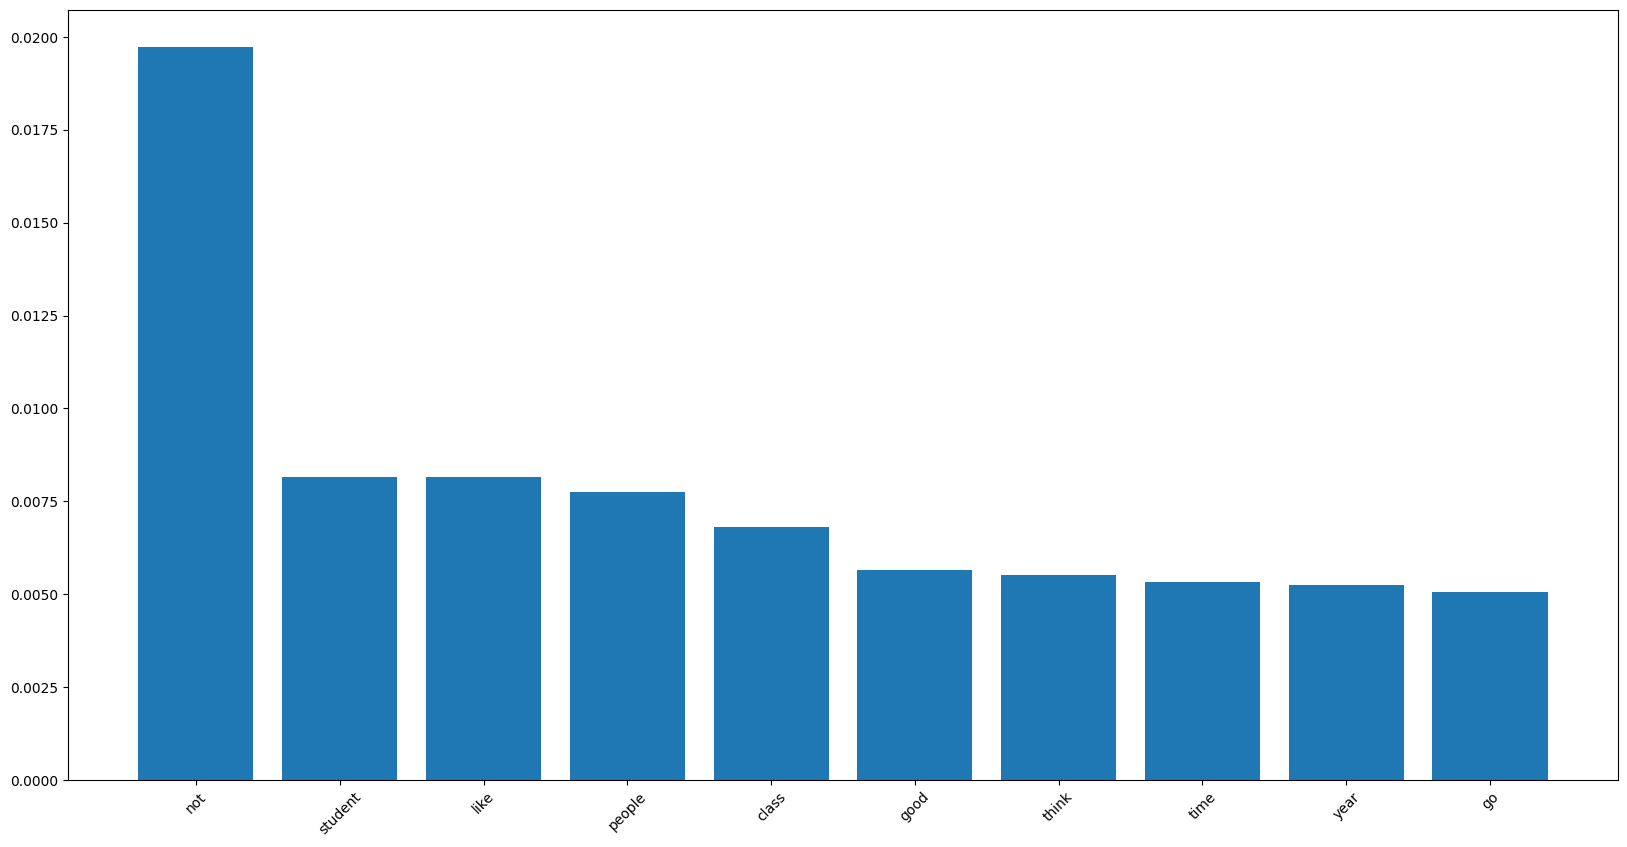

In [24]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [25]:
#pandas allows us to access specific words in the series using the index
word_counts["student loan"]

4.138501862325838e-05

In [26]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000034
cs                  0.001228
computer            0.000262
dtype: float64

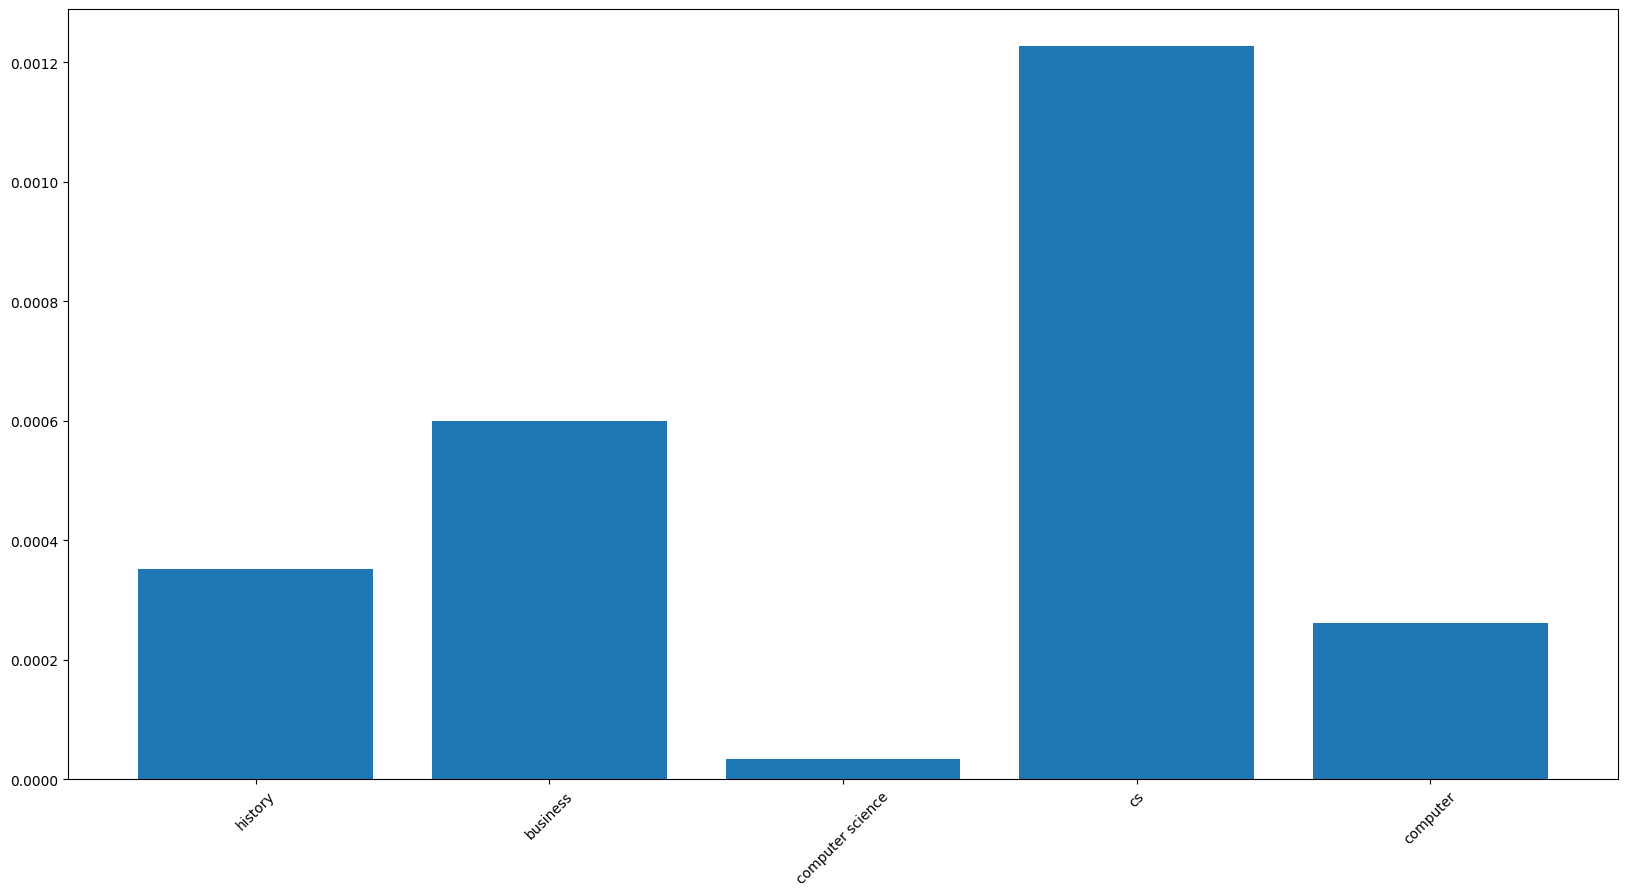

In [27]:

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [28]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 

In [29]:
plot_list2=word_counts[["math", "class", "major", "semester", "pay dollar"]]
plot_list2

math          0.002262
class         0.006815
major         0.002014
semester      0.002566
pay dollar    0.000021
dtype: float64

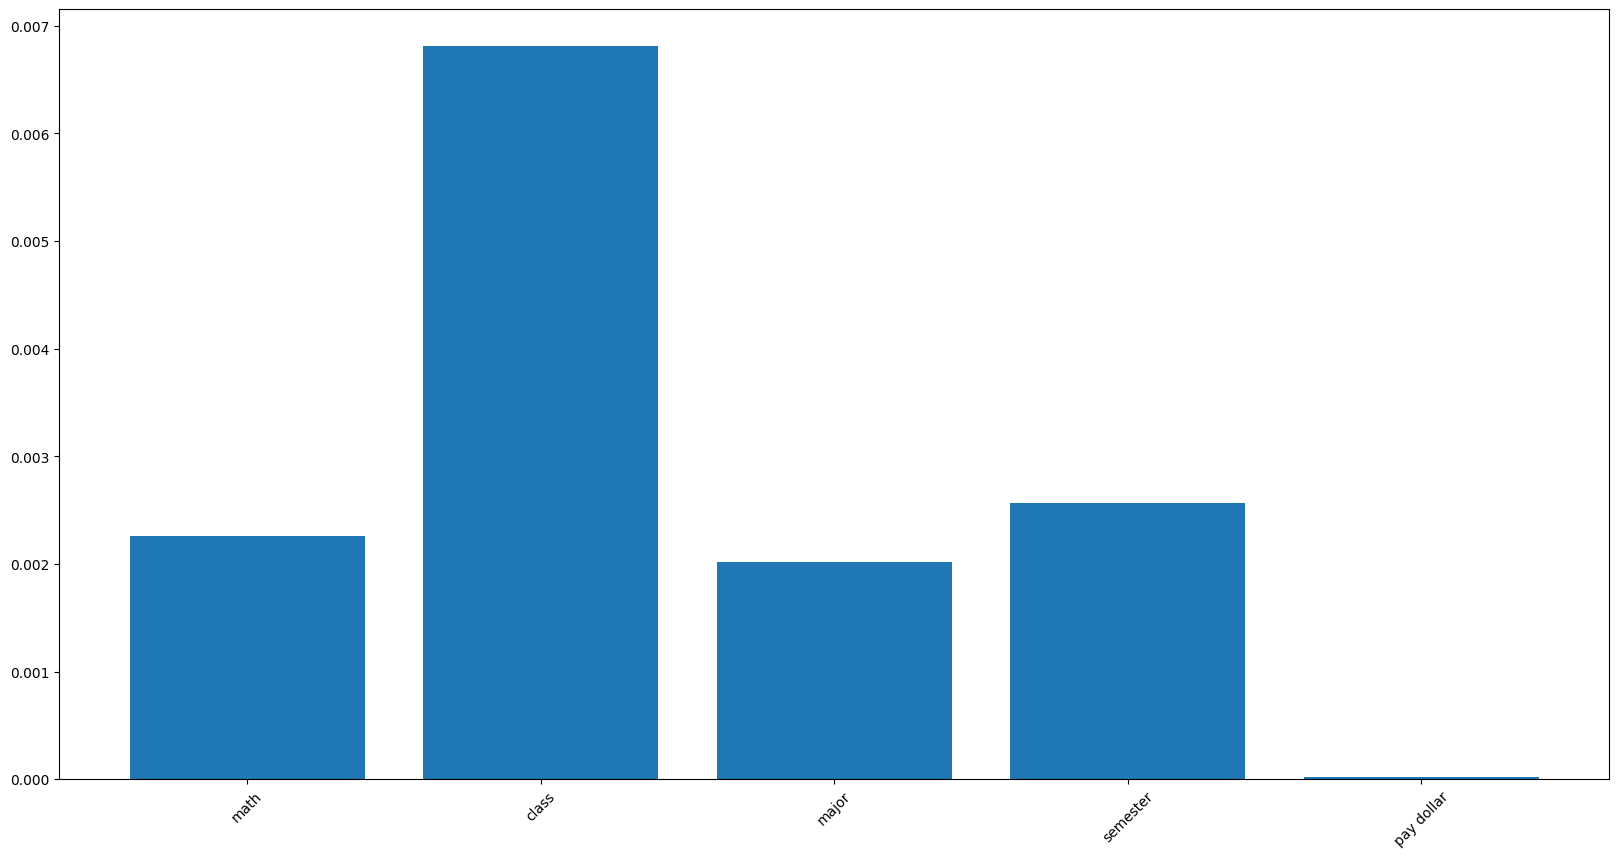

In [30]:
plt.figure(figsize=(20,10))
plt.bar(plot_list2.index, plot_list2.values)
plt.xticks(rotation=45)
plt.show()

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

In [31]:
uiuc=pd.read_csv("uiuc.csv")

In [32]:
uiuc['cleaned_text'] = uiuc['text'].apply(clean)
uiuc['text'][0]

'Have the same professor! And in lecture he did say we were gonna have to learn some of the stuff ourself\xa0\n\nI would recommend using online resources such as Paul’s Online Math Notes and Professor Leonard on YouTube. Personally, I’ve been learning the material from those sources before going to lecture'

In [33]:
vectorizer = CountVectorizer()
bag_of_words2 = vectorizer.fit_transform(uiuc['cleaned_text'])
bag_of_words2

<4725x10109 sparse matrix of type '<class 'numpy.int64'>'
	with 98566 stored elements in Compressed Sparse Row format>

In [34]:
bow_df2 = pd.DataFrame(bag_of_words2.toarray(), columns=vectorizer.get_feature_names_out())
bow_df2

,aa,aaa,aaaaah,aaabb,ab,abandoned,abcc,abide,abilities,ability,...,zombie,zone,zones,zoo,zoom,zoomed,봉사를,세계로,숭실,진리와
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
word_counts2 = bow_df2.sum()
word_counts2 = word_counts2.sort_values(ascending=False)
word_counts2

the                                                                                                       4613
to                                                                                                        3629
and                                                                                                       2973
you                                                                                                       2551
of                                                                                                        1854
                                                                                                          ... 
httpswwwwciacomnewsraresquirrelmemorializedonuoficampus                                                      1
httpswwwurbanaillinoisussitesdefaultfilesattachmentslandlordtenantpdf                                        1
httpswwwuoficreditunionorgcreditcreditcardshttpswwwuoficreditunionorgcreditcreditcards                       1
h

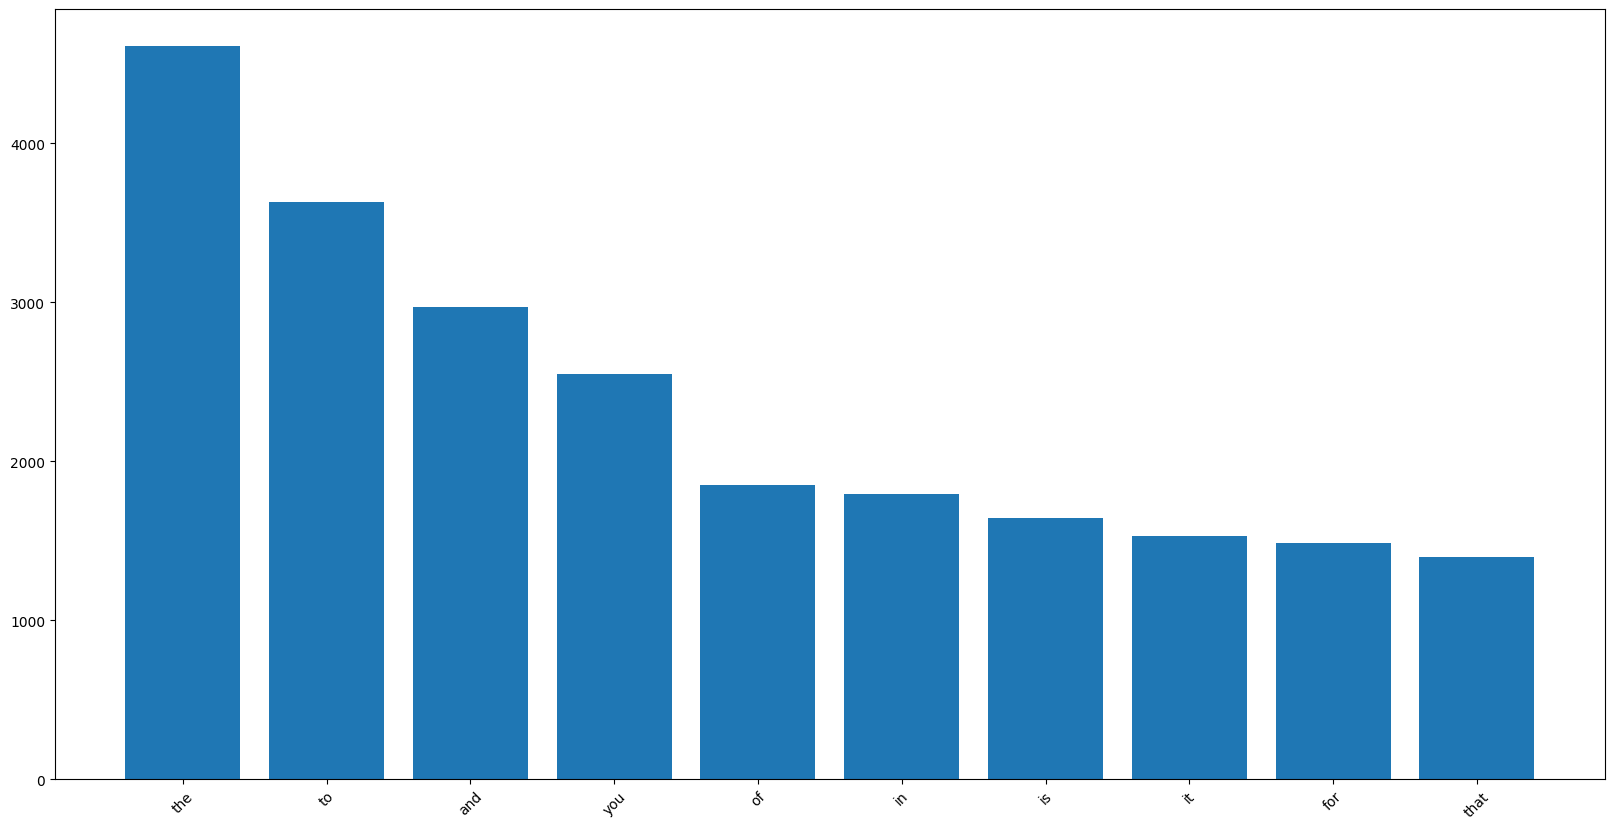

In [36]:
word_counts2 = word_counts2.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts2.index, word_counts2.values)
plt.xticks(rotation=45)
plt.show()

In [37]:
uiuc['lemmatized_text'] = uiuc['cleaned_text'].apply(lemmatize)

In [38]:
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words2 = vectorizer.fit_transform(mich['lemmatized_text'])
bag_of_words2

<8339x8637 sparse matrix of type '<class 'numpy.int64'>'
	with 126833 stored elements in Compressed Sparse Row format>

In [39]:
bow_df2 = pd.DataFrame(bag_of_words2.toarray(), columns=vectorizer.get_feature_names_out())
word_counts2 = bow_df2.sum()
word_counts2 = word_counts2.sort_values(ascending=False)
word_counts2

not               2862
student           1183
like              1183
people            1124
class              988
                  ... 
sell minnesota       3
cred                 3
credential           3
sell oregon          3
pay dollar           3
Length: 8637, dtype: int64

In [40]:
word_counts2 = word_counts2 / word_counts2.sum()

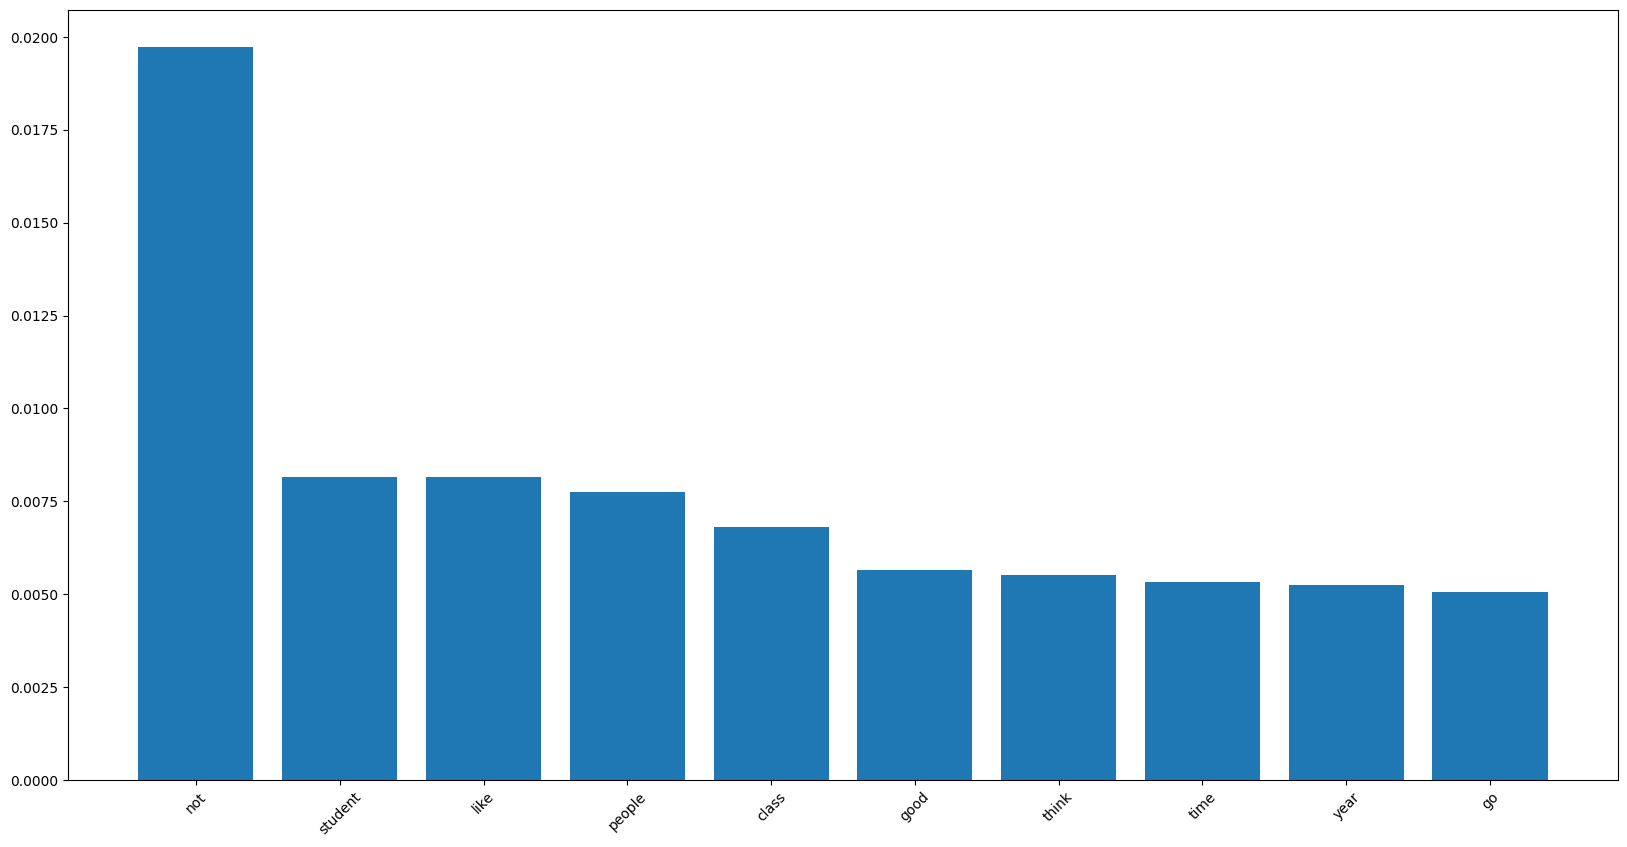

In [41]:
plot_list3 = word_counts2.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list3.index, plot_list3.values)
plt.xticks(rotation=45)
plt.show()

I find that the frequent used words in both umich and uiuc subreddit are basically same.

### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [42]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [43]:
#clean and lemmatize the data csv
data['clean_text'] = data['text'].apply(clean)
data['lemmatized_text'] = data['clean_text'].apply(lemmatize)

In [44]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bad_of_words3 = vectorizer.fit_transform(data['clean_text'])

In [45]:
#train a logistic regression model using the bag of words features as X and the label column as y
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
y = data['label']
model = LogisticRegression(max_iter=1000)
model.fit(bad_of_words3,y)

LogisticRegression(max_iter=1000)

In [48]:
#report the accuracy of the model
y_pred = model.predict(bad_of_words3)
accuracy = accuracy_score(y, y_pred)
accuracy

0.9277248677248677

#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

In [51]:
# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 
X = bad_of_words3
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.719047619047619


The accuracy of this model is 0.7126984, which is worse than previous. With a train-test split, the accuracy on the test set is generally lower because the model is facing new data that it hasn't been trained on. This is more reflective of the model’s true performance on real-world data.

#### Part 3: Examine the top features of your model using the following code

In [52]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?

In [53]:
coefficients = pd.DataFrame({'feature': vectorizer.get_feature_names_out(), 'coefficient': model.coef_[0]})
coefficients = coefficients.sort_values('coefficient', ascending=False)

top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)

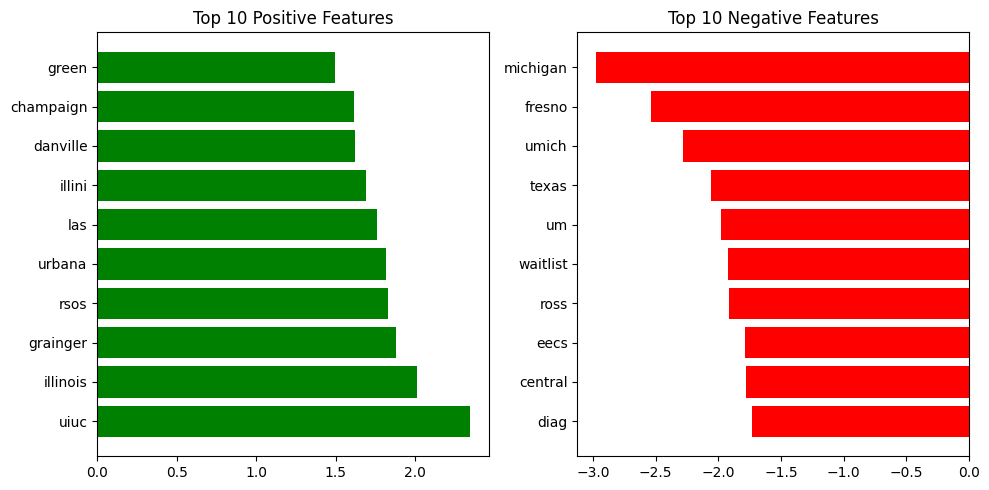

In [54]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.barh(top_10_positive['feature'], top_10_positive['coefficient'], color='green')
plt.title('Top 10 Positive Features')

plt.subplot(1, 2, 2)
plt.barh(top_10_negative['feature'], top_10_negative['coefficient'], color='red')
plt.title('Top 10 Negative Features')

plt.tight_layout()
plt.show()

In [55]:
#examine these words and see if they make sense. Do they differentiate UIUC from another university?

The words make sense because they are specific and relevant to the respective schools. I think it does since uiuc is in the top10 positive features and unich is in top10 negative features.

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [56]:
!pip install gensim

In [60]:
import gensim
from gensim import corpora
uiuc['clean_text'] = uiuc['text'].apply(clean)
uiuc['lemmatized_text'] = uiuc['clean_text'].apply(lemmatize)
tokenized_text = [comment.split() for comment in uiuc['lemmatized_text']]
dictionary = corpora.Dictionary(tokenized_text)
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

In [61]:
from gensim.models.ldamodel import LdaModel
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42, passes=10)

In [62]:
topics = lda_model.print_topics(num_words=10)
for i, topic in topics:
    print(f"Topic {i}: {topic}")

Topic 0: 0.016*"housing" + 0.014*"year" + 0.013*"not" + 0.010*"good" + 0.010*"d" + 0.009*"money" + 0.008*"go" + 0.008*"student" + 0.008*"see" + 0.008*"s"
Topic 1: 0.031*"class" + 0.023*"not" + 0.021*"student" + 0.009*"hour" + 0.009*"start" + 0.009*"dm" + 0.008*"week" + 0.008*"time" + 0.008*"credit" + 0.008*"need"
Topic 2: 0.020*"s" + 0.015*"not" + 0.014*"post" + 0.012*"think" + 0.010*"lol" + 0.009*"charge" + 0.009*"m" + 0.009*"apartment" + 0.009*"yes" + 0.007*"get"
Topic 3: 0.030*"m" + 0.017*"not" + 0.015*"review" + 0.012*"interested" + 0.011*"lease" + 0.009*"check" + 0.008*"contact" + 0.007*"fakespot" + 0.007*"product" + 0.007*"textbook"
Topic 4: 0.031*"people" + 0.024*"friend" + 0.019*"not" + 0.017*"m" + 0.016*"feel" + 0.013*"year" + 0.012*"like" + 0.011*"know" + 0.011*"good" + 0.011*"go"
Topic 5: 0.042*"not" + 0.023*"thank" + 0.013*"like" + 0.013*"bike" + 0.011*"car" + 0.010*"get" + 0.010*"people" + 0.009*"pay" + 0.009*"say" + 0.009*"safe"
Topic 6: 0.027*"not" + 0.012*"find" + 0.012

In [65]:
topics_per_comment = lda_model[corpus] 
def get_top_comments(topic_id, num_comments=3):
    relevant_comments = []
    for idx, topic_dist in enumerate(topics_per_comment):
        dominant_topic = sorted(topic_dist, key=lambda x: x[1], reverse=True)[0]
        if dominant_topic[0] == topic_id:
            relevant_comments.append((idx, dominant_topic[1]))  
    top_comments = sorted(relevant_comments, key=lambda x: x[1], reverse=True)[:num_comments]
    return [uiuc.iloc[idx]['text'] for idx, freq in top_comments]

In [67]:
for topic_id in range(10):
    print(f"\nComments for Topic {topic_id}:")
    top_comments = get_top_comments(topic_id)
    for comment in top_comments:
        print(comment)


Comments for Topic 0:
No keep at it but i was just saying you may be in a slow moving vetting/review system due to staffing issues in HR. If you look at the jobs you applied for you can perhaps see if they have been filled. Apply for any and all they you are qualified for as each open req will move forward at its own pace based on departmental demands as well as HR availability for some of the steps. Best of luck.
Everyone on my floor(floor above the lobby) heard a thud/bang noise and a scream, and immediately assumed the worst and sprinted out the exit. Looks like there was no violent intruder and it was a medical emergency, but yeah everyone was genuinely scared for their lives for a few minutes.
Currently a student working in housing. Have never had a pleasant experience with anyone but other student workers. Literally just had an incident the other day where some woman I had never seen before snapped and scolded me for something like she was my mother??? It wasn’t even work relate

I think my labels are representative since the example comments aligned with the dominant words in the topic.
